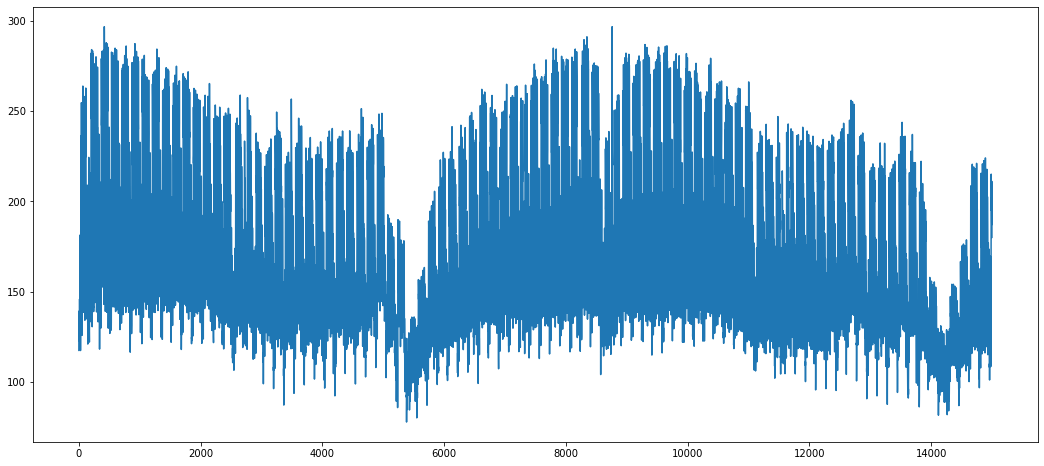

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import shapelets.compute as sc
from shapelets.compute.distances import DistanceType 
from shapelets.data import load_mat, load_dataset 

data = load_mat('ItalianPowerDemand.mat')[0:15000,2]
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(data)
plt.show()



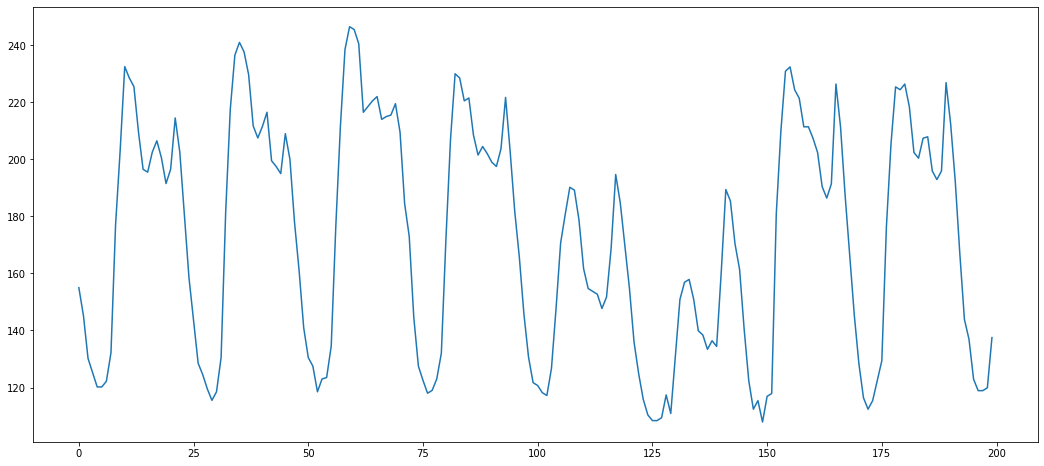

In [2]:
query = load_mat('ItalianPowerDemand.mat')[15000:15200,2]
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(query)
plt.show()


In [3]:
# Search closest match
single_search = sc.matrixprofile.mass(query, data)


In [4]:
pos, _ = sc.argmin(single_search)

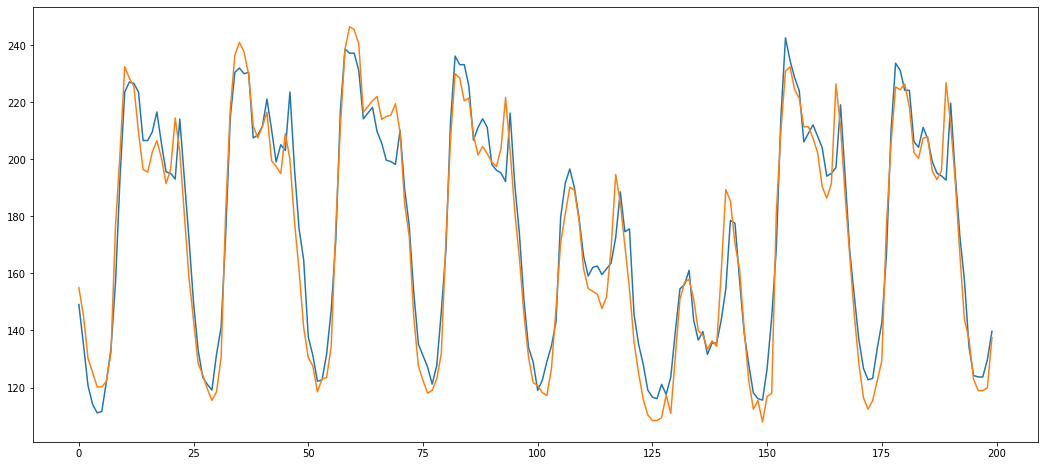

In [5]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(data[pos:pos+200])
ax.plot(query)
plt.show()



In [6]:
indices, values = sc.sort_index(single_search)
print("Closest...")
for i in np.array(indices[:10]):
    print(i)

print("\nQuite different...")
for i in np.array(indices[-10:]):
    print(i)


Closest...
11136
10800
11808
10296
1895
10464
1223
10632
2063
1055

Quite different...
6998
6855
6831
6999
8536
8534
8558
8560
8535
8559


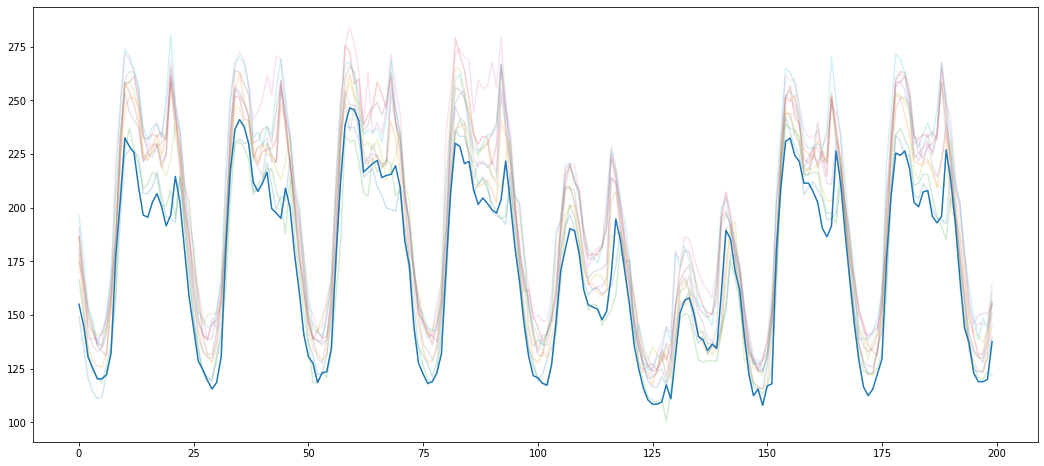

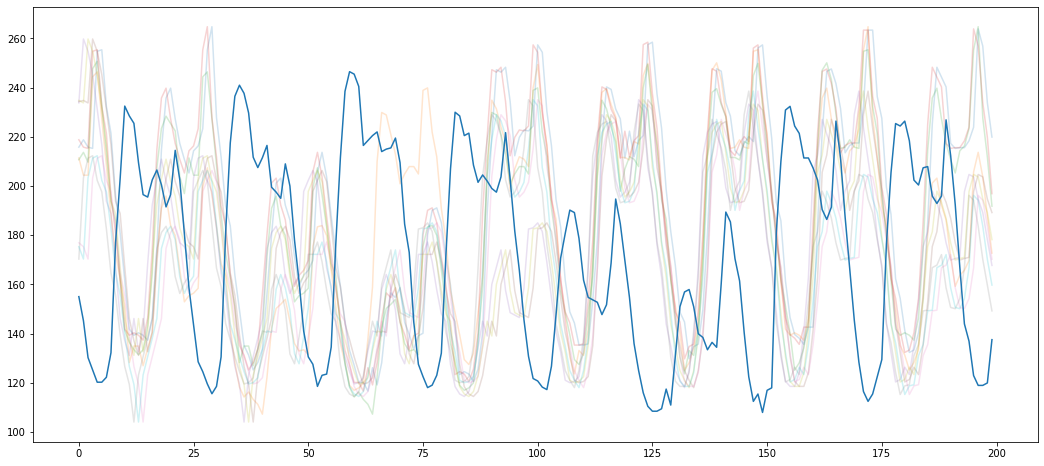

In [7]:

fig, ax = plt.subplots(figsize=(18, 8))
for i in np.array(indices[:10]):
    ax.plot(data[i:i+200], alpha=0.2)
ax.plot(query)
plt.show()

fig, ax = plt.subplots(figsize=(18, 8))
for i in np.array(indices[-10:]):
    ax.plot(data[i:i+200], alpha=0.2)
ax.plot(query)
plt.show()



(200, 5)


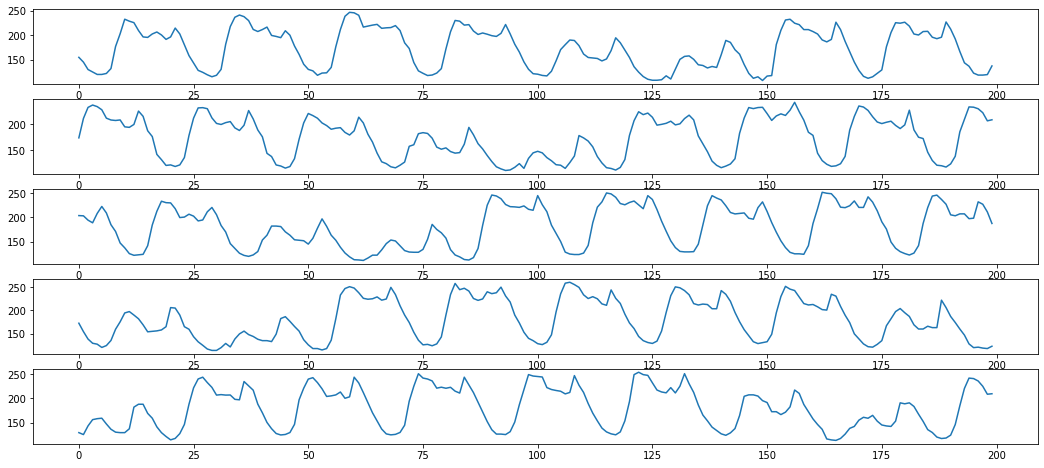

In [8]:

## Running multiple queries at once!
sample_region = load_mat('ItalianPowerDemand.mat')[15000:16000,2]
queries = sc.unwrap(sample_region, 200, 1, 200, 1)
print(queries.shape)
fig, ax = plt.subplots(5, 1, figsize=(18, 8))
for i in range(5):
    ax[i].plot(queries[:, i])
plt.show()


In [9]:
multiple_results = sc.matrixprofile.mass(queries, data)

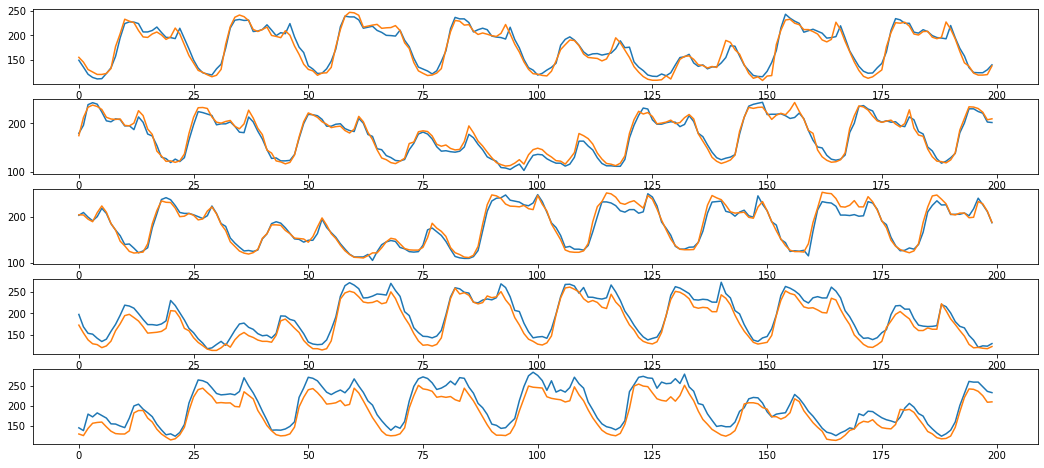

In [10]:
indices, distances = sc.argmin(multiple_results, 0)
fig, ax = plt.subplots(5, 1, figsize=(18, 8))
for i in range(5):
    start = np.array(indices[i])[0]
    end = start + 200
    ax[i].plot(data[start:end])
    ax[i].plot(queries[:, i])
plt.show()


In [11]:

# Visualizing Distances
sc.distances.mpdist(queries[:, 0], queries[:, 1], w=20)



[1 1 1 1]
    0.4495 

In [12]:
l=["Ts1", "Ts2", "Ts3", "Ts4", "Ts5"]
dst = sc.distances.pdist(queries, DistanceType.MPDist, w=25)

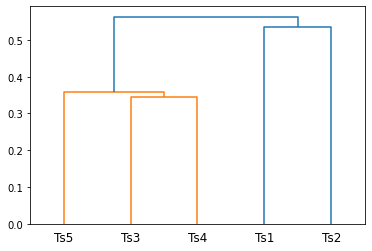

In [13]:

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
dists = squareform(dst)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=l)
plt.show()

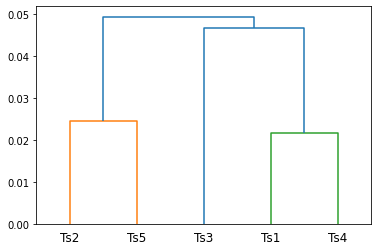

In [14]:

# With SBD Distance
dists = squareform(sc.distances.pdist(queries, DistanceType.SBD))
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=l)
plt.show()


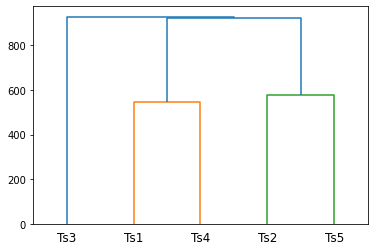

In [15]:

# With Euclidian Distance
dists = squareform(sc.distances.pdist(queries, DistanceType.Euclidean))
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=l)
plt.show()
